In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
data = pd.read_csv(r"/content/uber.csv")
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3.0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5.0
...,...,...,...,...,...,...,...,...,...
160893,2746704,2009-07-31 15:43:42.0000002,3.7,2009-07-31 15:43:42 UTC,-73.957663,40.773759,-73.950232,40.772204,1.0
160894,9271205,2009-10-16 06:13:00.00000029,16.1,2009-10-16 06:13:00 UTC,-74.011105,40.715722,-73.956147,40.763402,1.0
160895,11825371,2012-02-26 01:22:00.000000104,14.5,2012-02-26 01:22:00 UTC,-73.987602,40.760492,-74.011648,40.714265,1.0
160896,39364353,2010-04-11 12:12:31.0000003,11.7,2010-04-11 12:12:31 UTC,-74.015735,40.715011,-73.988747,40.736817,2.0


In [ ]:
 # 1. Pre-process the dataset

In [ ]:
 # Remove unnecessary column
 data["pickup_datetime"] = pd.to_datetime(data["pickup_datetime"])

In [ ]:
 missing_values = data.isnull().sum()
 print("Missing values in the dataset:")
 print(missing_values)

Missing values in the dataset:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    2
dropoff_latitude     2
passenger_count      1
dtype: int64


In [ ]:
 # Handle missing values
 # We can choose to drop rows with missing values or fill them with appropriate values.
 data.dropna(inplace=True)

In [ ]:
 # To fill missing values with the mean value of the column:
#data.fillna(data.mean(), inplace=True)

In [ ]:
# Ensure there are no more missing values
missing_values = data.isnull().sum()
print("Missing values after handling:")
print(missing_values)

Missing values after handling:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


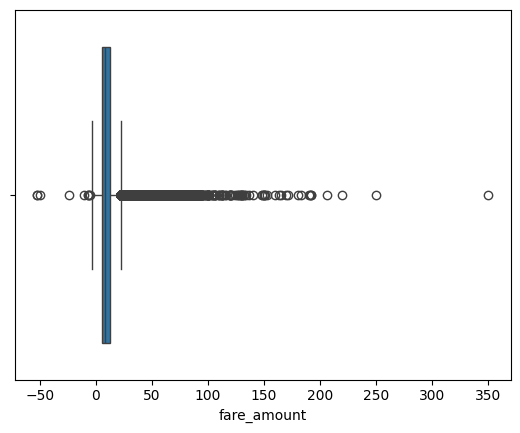

In [ ]:
 # 2. Identify outliers
 # visualization to detect outliers.
 sns.boxplot(x=data["fare_amount"])
 plt.show()

In [ ]:
 # Calculate the IQR for the 'fare_amount' column
 Q1 = data["fare_amount"].quantile(0.25)
 Q3 = data["fare_amount"].quantile(0.75)
 IQR = Q3 - Q1

In [ ]:
 # Define a threshold (e.g., 1.5 times the IQR) to identify outliers
 threshold = 1.5
 lower_bound = Q1 - threshold * IQR
 upper_bound = Q3 + threshold * IQR

In [ ]:
# Remove outliers
data_no_outliers = data[(data["fare_amount"] >= lower_bound) & (data["fare_amount"] <= upper_bound)]

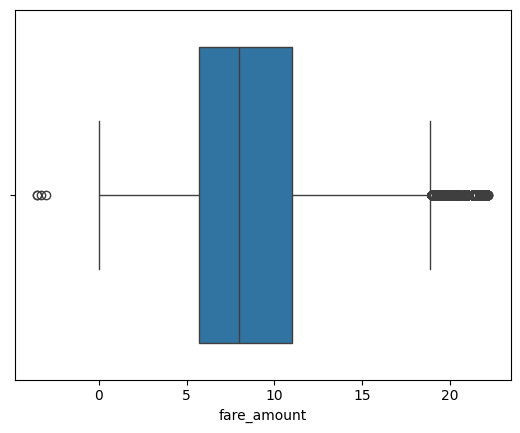

In [ ]:
# Visualize the 'fare_amount' distribution without outliers
sns.boxplot(x=data_no_outliers["fare_amount"])
plt.show()

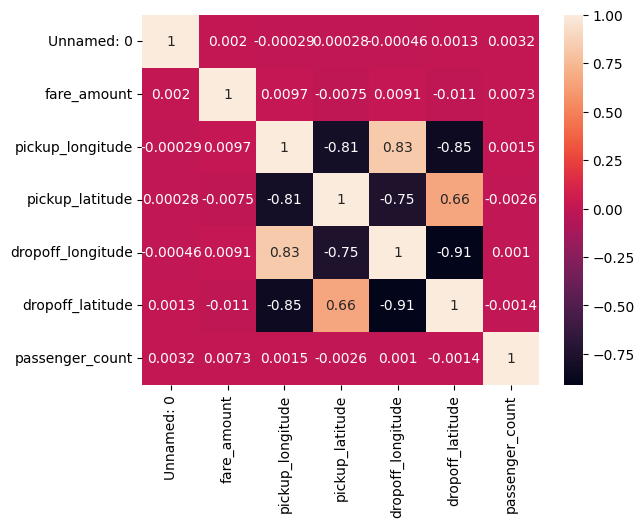

In [ ]:
 # 3. Check the correlation
 # Determine the correlation between features and the target variable (fare_amount).
 #correlation_matrix = data.corr()
 # Exclude non-numeric columns
 correlation_matrix = data.select_dtypes(include=['number']).corr()
 sns.heatmap(correlation_matrix, annot=True)
 plt.show()

In [ ]:
# 4. Implement linear regression and random forest regression models
 # Split the data into features and target variable
X = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = data['fare_amount']  #Target

In [ ]:
 # Split the data into training and testing sets
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
 # Create and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = lr_model.predict(X_test)

In [33]:
r2score = r2_score(y_test,y_pred)
print(r2score)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

0.0002066404666295485
10.18496124895529


In [ ]:
# Create and train the random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
y_pred = rf_model.predict(X_test)
y_pred

array([ 6.835     , 12.31387741, 11.795     , ...,  9.812     ,
        5.743     , 16.097     ])

In [35]:
r2score = r2_score(y_test,y_pred)
print(r2score)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.7475239969338214


5.118165324583664